In [12]:
import numpy as np
import os
import globe
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [6]:
app = FaceAnalysis(name='buffalo_l')

download_path: C:\Users\sun24/.insightface\models\buffalo_l


100%|████████████████████████████████████████████████████████████████████████| 281857/281857 [01:48<00:00, 2602.32KB/s]
C:\Users\sun24\anaconda3\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\sun24/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\sun24/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\sun24/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\sun24/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\sun24/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [7]:
app.prepare(ctx_id=0, det_size=(640,640))

set det-size: (640, 640)


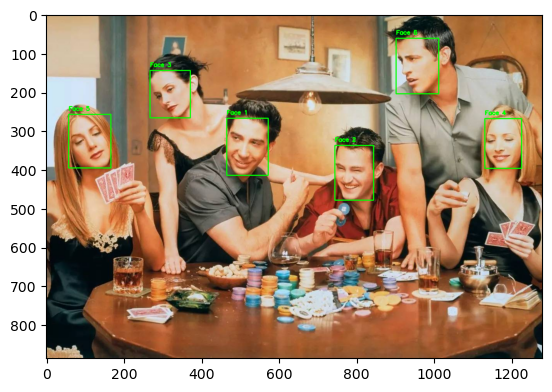

In [31]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [10]:
faces = app.get(img)

C:\Users\sun24\anaconda3\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [24]:
len(faces)

6

In [26]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

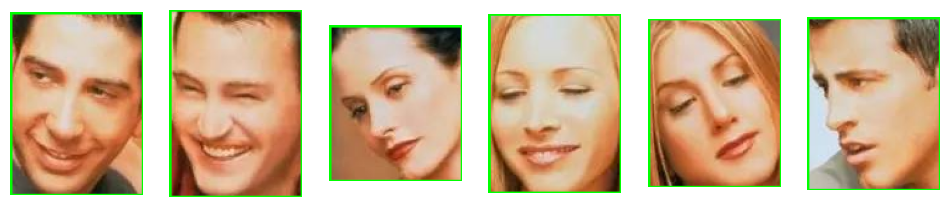

In [40]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    axs[i].axis('off')

plt.show()

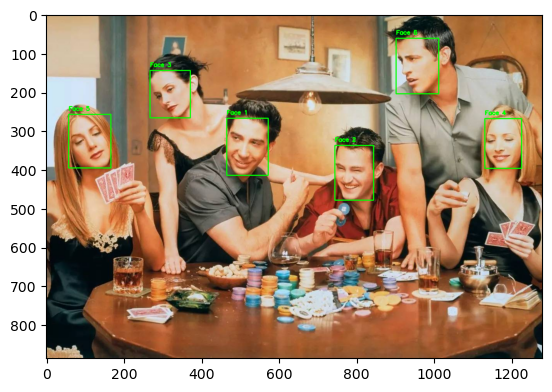

In [41]:
# GPT Code

# Iterate through the detected faces
for idx, face in enumerate(faces):
    # Get the bounding box coordinates
    bbox = face.bbox.astype(int)

    # Draw the bounding box on the image
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

    # Annotate the face with the face ID
    cv2.putText(img, f"Face {idx+1}", (bbox[0], bbox[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(img[:, :, ::-1])
plt.show()

In [42]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',download=False,download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


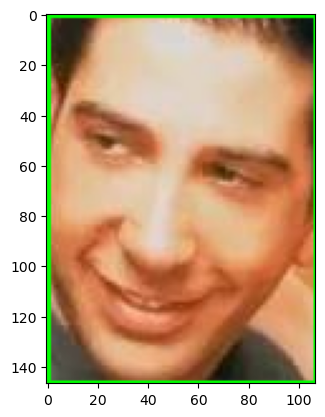

<Figure size 640x480 with 0 Axes>

In [57]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

# Turn off axis
ax.axis('off')
# Save the image
plt.savefig('ross_output_image.png', bbox_inches='tight', pad_inches=0)

In [46]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back = True)

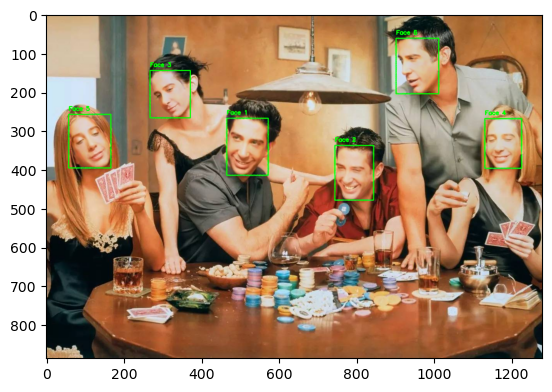

In [47]:
plt.imshow(res[:,:,::-1])
plt.show()

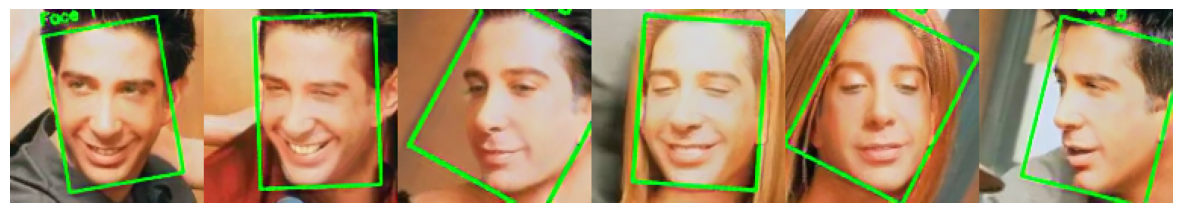

<Figure size 640x480 with 0 Axes>

In [58]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back = False)
    res.append(_img)
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize=(15,5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

# Turn off axis
ax.axis('off')
# Save the image
plt.savefig('ross_output_image.png', bbox_inches='tight', pad_inches=0)

In [50]:
print('hello')

hello


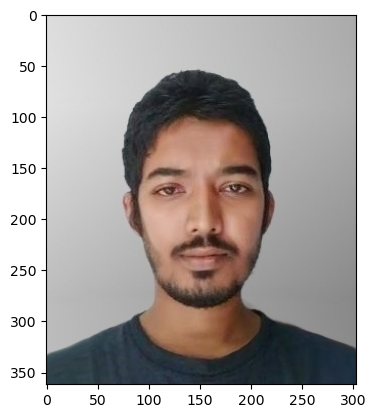

In [51]:
san = cv2.imread('20230712045557161.jpg')
plt.imshow(san[:,:,::-1])
plt.show()

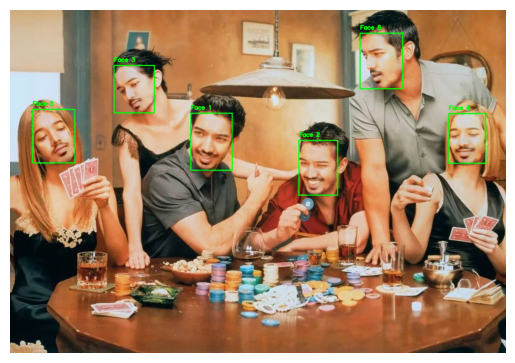

In [54]:
san_faces = app.get(san)
san_face = san_faces[0]

res = img.copy()
for face in faces:
    res = swapper.get(res, face, san_face, paste_back = True)
    
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

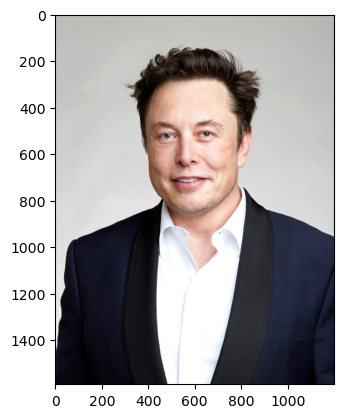

In [55]:
eln = cv2.imread('Elon_Musk.jpg')
plt.imshow(eln[:,:,::-1])
plt.show()

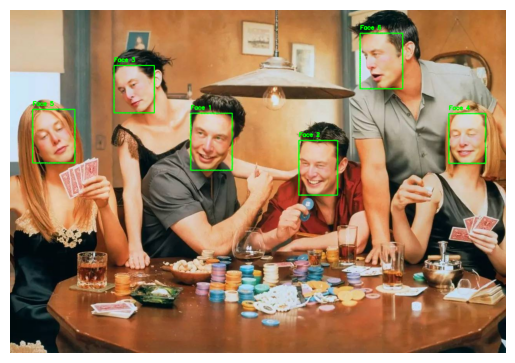

In [56]:
eln_faces = app.get(eln)
eln_face = eln_faces[0]

res = img.copy()
for face in faces:
    res = swapper.get(res, face, eln_face, paste_back = True)
    
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()